# dataset loading → preprocessing → model training → evaluation → visualization → comparison → tuning.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


In [14]:
zip_path = "/content/covertype.zip"

# Step 1: Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/")  # extract in content folder


In [16]:
# Load the dataset from the .gz file
data = pd.read_csv('/content/covtype.data.gz', compression='gzip', header=None)

print("Dataset Loaded Successfully!")
print("Shape:", data.shape)
data.head()


Dataset Loaded Successfully!
Shape: (581012, 55)


,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [17]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   0       581012 non-null  int64
 1   1       581012 non-null  int64
 2   2       581012 non-null  int64
 3   3       581012 non-null  int64
 4   4       581012 non-null  int64
 5   5       581012 non-null  int64
 6   6       581012 non-null  int64
 7   7       581012 non-null  int64
 8   8       581012 non-null  int64
 9   9       581012 non-null  int64
 10  10      581012 non-null  int64
 11  11      581012 non-null  int64
 12  12      581012 non-null  int64
 13  13      581012 non-null  int64
 14  14      581012 non-null  int64
 15  15      581012 non-null  int64
 16  16      581012 non-null  int64
 17  17      581012 non-null  int64
 18  18      581012 non-null  int64
 19  19      581012 non-null  int64
 20  20      581012 non-null  int64
 21  21      581012 non-null  int64
 22  22      581012 non-n

In [19]:
columns = [
    'Elevation', 'Aspect', 'Slope',
    'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
    'Horizontal_Distance_To_Roadways', 'Hillshade_9am',
    'Hillshade_Noon', 'Hillshade_3pm',
    'Horizontal_Distance_To_Fire_Points'
]

# 40 Wilderness_Area binary columns
for i in range(1, 5):
    columns.append(f'Wilderness_Area_{i}')

# 40 Soil_Type binary columns
for i in range(1, 41):
    columns.append(f'Soil_Type_{i}')

# Target column
columns.append('Cover_Type')

data.columns = columns

print("Columns Assigned Successfully!")
print("Columns:", len(data.columns))
data.head()


Columns Assigned Successfully!
Columns: 55


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area_1                   581012 non-null  int64
 11  Wilderness_Area_2                   581012 non-null 

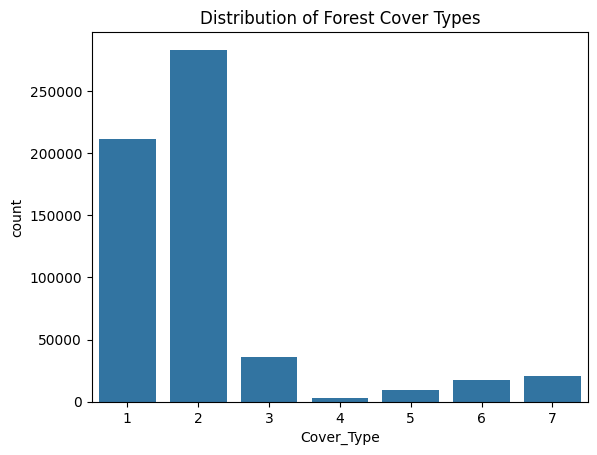

In [20]:
print(data.info())
print("\nMissing values:", data.isnull().sum().sum())

# Target variable distribution
sns.countplot(x='Cover_Type', data=data)
plt.title("Distribution of Forest Cover Types")
plt.show()


In [21]:
X = data.drop('Cover_Type', axis=1)
y = data['Cover_Type']

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Train shape:", X_train.shape, "| Test shape:", X_test.shape)


Train shape: (464809, 54) | Test shape: (116203, 54)


In [22]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [24]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train_scaled, y_train)

y_pred_rf = rf.predict(X_test_scaled)

print(" Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


 Random Forest Accuracy: 0.9542524719671609

Classification Report:
               precision    recall  f1-score   support

           1       0.96      0.94      0.95     42368
           2       0.95      0.97      0.96     56661
           3       0.94      0.96      0.95      7151
           4       0.92      0.85      0.88       549
           5       0.95      0.78      0.86      1899
           6       0.93      0.89      0.91      3473
           7       0.97      0.95      0.96      4102

    accuracy                           0.95    116203
   macro avg       0.95      0.91      0.92    116203
weighted avg       0.95      0.95      0.95    116203



In [27]:
#  Shift target labels to start from 0
y_train_fixed = y_train - 1
y_test_fixed = y_test - 1

# Train XGBoost model
xgb = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)
xgb.fit(X_train_scaled, y_train_fixed)

# Predictions
y_pred_xgb = xgb.predict(X_test_scaled)

# Accuracy and report
print("Accuracy:", accuracy_score(y_test_fixed, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test_fixed, y_pred_xgb))

Accuracy: 0.8153317900570554

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80     42368
           1       0.82      0.86      0.84     56661
           2       0.81      0.87      0.84      7151
           3       0.84      0.85      0.84       549
           4       0.87      0.34      0.49      1899
           5       0.75      0.59      0.66      3473
           6       0.91      0.82      0.86      4102

    accuracy                           0.82    116203
   macro avg       0.83      0.73      0.76    116203
weighted avg       0.82      0.82      0.81    116203



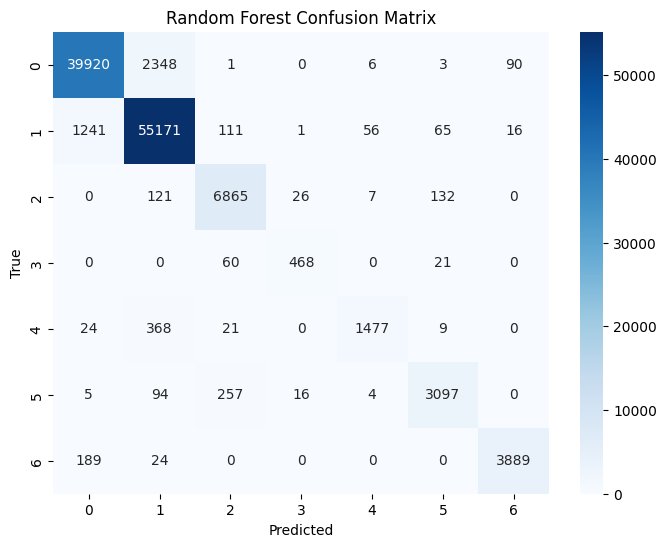

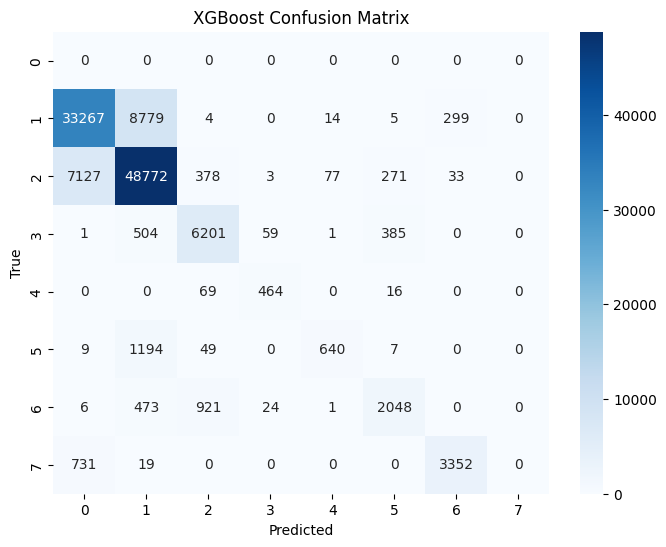

In [28]:
def plot_conf_matrix(y_true, y_pred, title):
    plt.figure(figsize=(8,6))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

plot_conf_matrix(y_test, y_pred_rf, "Random Forest Confusion Matrix")
plot_conf_matrix(y_test, y_pred_xgb, "XGBoost Confusion Matrix")


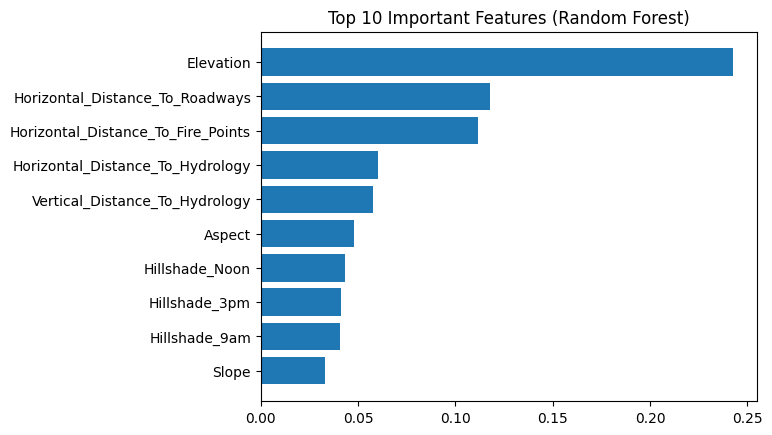

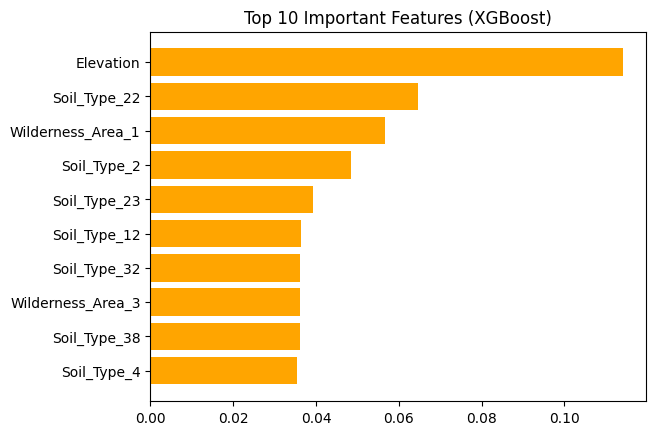

In [29]:
# Random Forest Feature Importance
importances = rf.feature_importances_
indices = np.argsort(importances)[-10:]
plt.barh(range(10), importances[indices], align='center')
plt.yticks(range(10), np.array(X.columns)[indices])
plt.title('Top 10 Important Features (Random Forest)')
plt.show()

# XGBoost Feature Importance
xgb_importance = xgb.feature_importances_
idx = np.argsort(xgb_importance)[-10:]
plt.barh(range(10), xgb_importance[idx], align='center', color='orange')
plt.yticks(range(10), np.array(X.columns)[idx])
plt.title('Top 10 Important Features (XGBoost)')
plt.show()


In [30]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))


Random Forest Accuracy: 0.9542524719671609
XGBoost Accuracy: 0.07936972367322702


In [31]:
import joblib

joblib.dump(rf, '/content/random_forest_model.pkl')
joblib.dump(xgb, '/content/xgboost_model.pkl')

print("Models Saved Successfully!")


Models Saved Successfully!
